In [1]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from matplotlib import pyplot as plt

from numpy import asarray
from numpy import save
from numpy import load

import pickle
import random


import pandas as pd
import seaborn as sns


In [2]:
# Keras Imports - CNN
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [3]:
with open("StrToNum.txt", "rb") as myFile:
    StrToNum = pickle.load(myFile)
with open("NumToStr.txt", "rb") as myFile:
    NumToStr = pickle.load(myFile)

In [4]:
# load numpy array from npy file
from numpy import load
# load array
trainData = load('finalTrainImgData.npy')
trainLabels = load('finalTrainClassName.npy')
# print the array
print(trainData.shape)
print(trainLabels.shape)
print(np.unique(trainLabels))

(78200, 32, 32)
(78200,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


In [5]:
%matplotlib notebook   

<IPython.core.display.Javascript object>


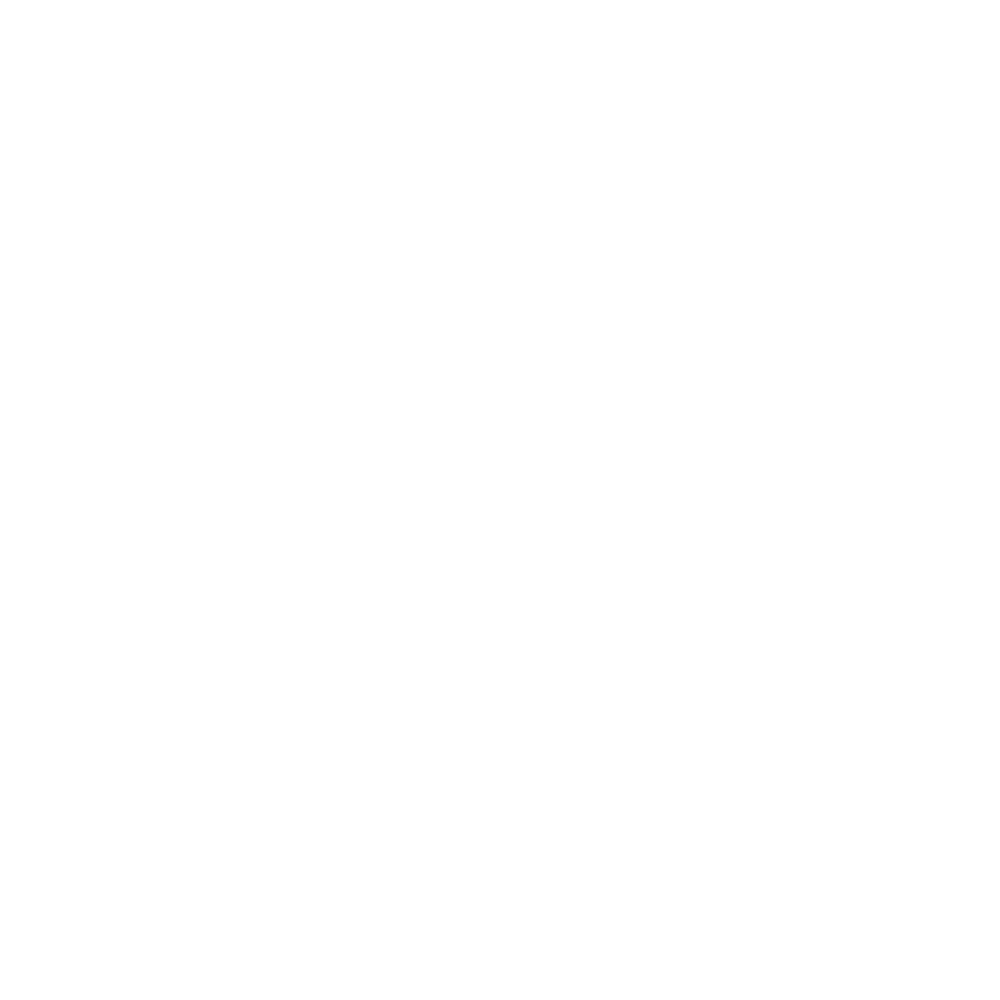

In [6]:
fig=plt.figure(figsize=(3,3))
for i in range(9):
    r=random.randint(0, 70000)
    plt.subplot(331+i)
    plt.imshow(trainData[r])
    plt.gca().set_title(NumToStr[trainLabels[r]])
fig.tight_layout()
fig.set_figheight(8)
fig.set_figwidth(8)

In [7]:
# load numpy array from npy file
from numpy import load
# load array
testData = load('finalTestImgData.npy')
testLabels = load('finalTestClassName.npy')
# print the array
print(testData.shape)
print(testLabels.shape)
print(np.unique(testLabels))

(13800, 32, 32)
(13800,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


<IPython.core.display.Javascript object>


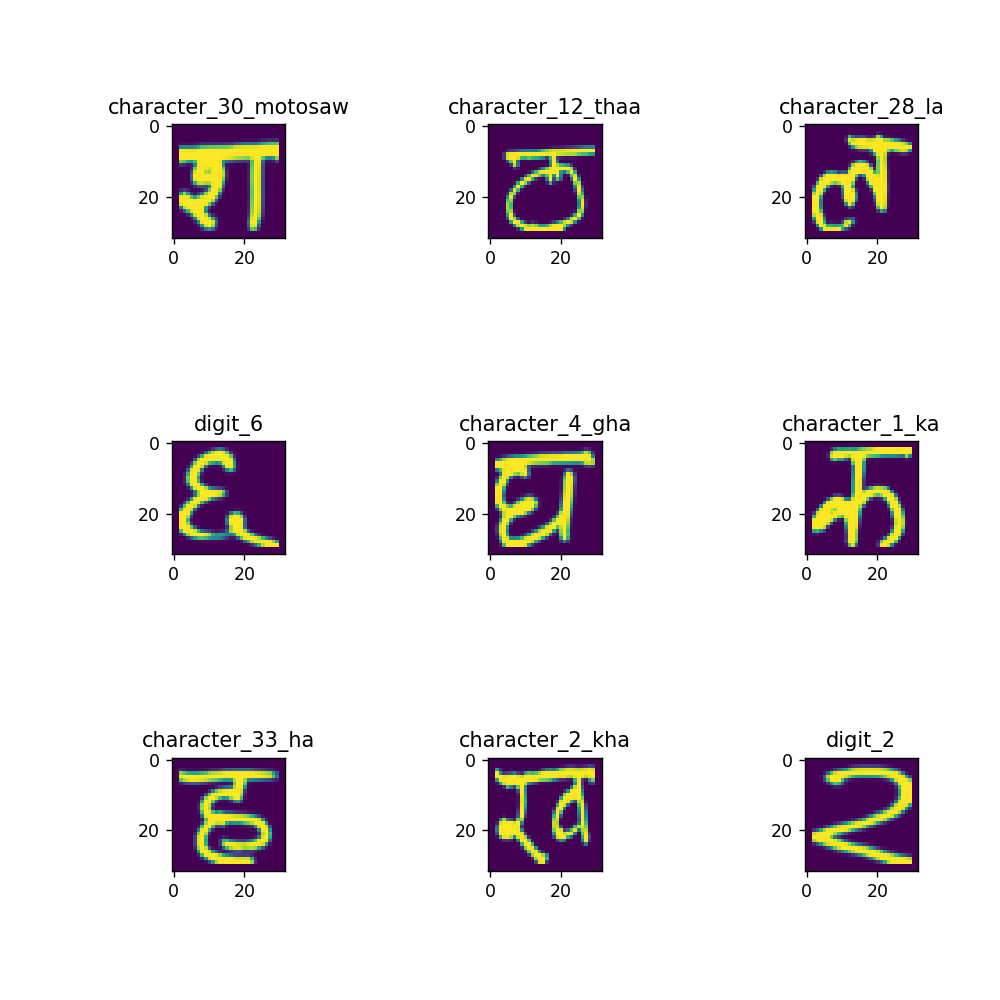

In [8]:
%matplotlib notebook       
fig=plt.figure(figsize=(3,3))
for i in range(9):
    r=random.randint(0, 13800)
    plt.subplot(331+i)
    plt.imshow(testData[r])
    plt.gca().set_title(NumToStr[testLabels[r]])
fig.tight_layout()
fig.set_figheight(8)
fig.set_figwidth(8)

In [9]:
cnn = Sequential()
im_shape = (32, 32, 1)
n_classes = 46

In [10]:
kernelSize = (3, 3)
ip_activation = 'relu'
ip_conv_0 = Conv2D(filters=32, kernel_size=kernelSize, input_shape=im_shape, activation=ip_activation)
cnn.add(ip_conv_0)

In [11]:
# Add the next Convolutional+Activation layer
ip_conv_0_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_0_1)

# Add the Pooling layer
pool_0 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
cnn.add(pool_0)

In [12]:
ip_conv_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_1)
ip_conv_1_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_1_1)

pool_1 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
cnn.add(pool_1)

In [13]:
# Let's deactivate around 20% of neurons randomly for training
drop_layer_0 = Dropout(0.2)
cnn.add(drop_layer_0)

In [14]:
flat_layer_0 = Flatten()
cnn.add(Flatten())
# Now add the Dense layers
h_dense_0 = Dense(units=128, activation=ip_activation, kernel_initializer='uniform')
cnn.add(h_dense_0)
# Let's add one more before proceeding to the output layer
h_dense_1 = Dense(units=64, activation=ip_activation, kernel_initializer='uniform')
cnn.add(h_dense_1)

In [15]:
op_activation = 'softmax'
output_layer = Dense(units=n_classes, activation=op_activation, kernel_initializer='uniform')
cnn.add(output_layer)

In [16]:
opt = 'adam'
loss = 'sparse_categorical_crossentropy'
metrics = ['accuracy']
# Compile the classifier using the configuration we want
cnn.compile(optimizer=opt, loss=loss, metrics=metrics)

In [17]:
print(cnn.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 64)          0

In [18]:
print(trainData.shape)
print(testData.shape)
trainData=np.resize(trainData,(trainData.shape[0], *im_shape))
testData=np.resize(testData,(testData.shape[0], *im_shape))
print(trainData.shape)
print(testData.shape)


(78200, 32, 32)
(13800, 32, 32)
(78200, 32, 32, 1)
(13800, 32, 32, 1)


In [44]:
#cnn.fit(trainData, trainLabels,batch_size=32, epochs=2, validation_data=(testData, testLabels))

Epoch 1/2
2444/2444 [==============================] - 229s 94ms/step - loss: 0.1781 - accuracy: 0.9439 - val_loss: 0.1261 - val_accuracy: 0.9614
Epoch 2/2
2444/2444 [==============================] - 243s 99ms/step - loss: 0.1192 - accuracy: 0.9635 - val_loss: 0.0993 - val_accuracy: 0.9704


In [47]:
#cnn.save("cnn.h5")  # we can save the model and reload it at anytime in the future
cnn = tf.keras.models.load_model('cnn.h5')

In [48]:
scores = cnn.evaluate(testData, testLabels, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 97.04%


In [21]:
#print(cnn.evaluate(trainData,trainLabels))

NameError: name 'model' is not defined

In [104]:
randomImgPath='D:\SOFTWARES\Jupyter\\p1.png'

<class 'PIL.Image.Image'>
(32, 32)
<class 'numpy.ndarray'>


<IPython.core.display.Javascript object>


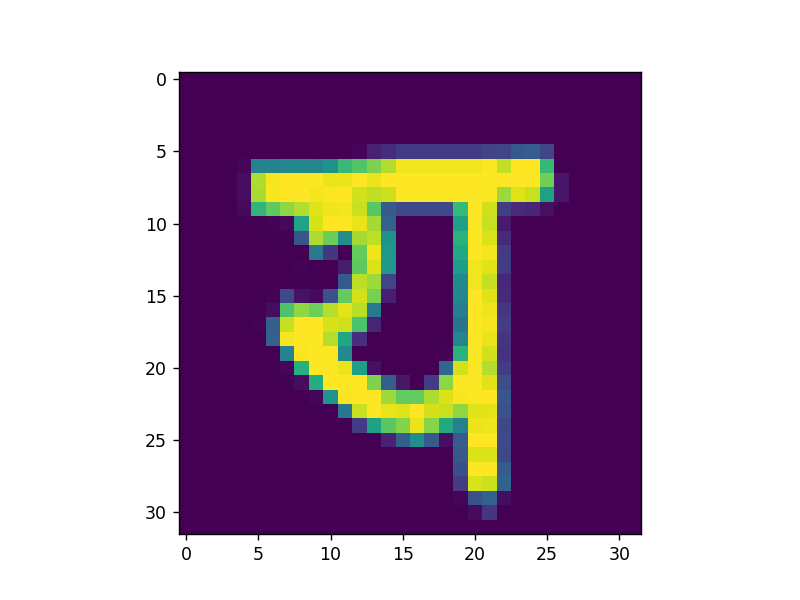

(78200, 32, 32, 1)
(1, 32, 32, 1)
character_6_cha


In [105]:
randomImg = Image.open(randomImgPath)

randomImg = randomImg.convert('L')


randomImg = randomImg.resize((32,32))
print(type(randomImg))

randomImg= np.array(randomImg)
randomImg= np.resize(randomImg,(32,32))
randomImg = randomImg.astype('float32')
randomImg /= 255  


print(randomImg.shape)

ip=np.resize(randomImg,(1,32,32,1))
# ip=testData[2:10]
print(type(ip))

plt.figure()

plt.subplot(111)
plt.imshow(ip[0])

print(trainData.shape)
print(ip.shape)
prediction = cnn.predict(ip)
print(NumToStr[np.argmax(prediction[0])])

